In [1]:
# mounting drive. Remove when testing/running locally
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/nanoscience_mast/deep-learn/hws/hw1/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/nanoscience_mast/deep-learn/hws/hw1


# Hands-on 01a: Introduction

## Numpy array basics

In [6]:
import numpy as np
# defining 1D array (a vector)
x = np.array([1, 2, 3, 4])

# shape of array
x.shape

/home/ilija/uni/deep-learn/hw/hw1/assignment1_gjerapić_s4437586


/home/ilija/anaconda3/envs/deep-learn-env/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


(4,)

In [2]:
# 2D array
w = np.array([[1, 2, 3, 4], [1, 2, 3, 4]])

# shape of array
w.shape

(2, 4)

In [3]:
# matrix multiplicaiton
out = np.matmul(w, x)

# simplified
out1 = w @ x

# checking shapes
print(out.shape)
print(out1.shape)


(2,)
(2,)


## Loading data with Numpy

In [8]:
data = np.loadtxt(fname = "data/inflammation-01.csv", delimiter=",")
print(data)

# printing features of data
print(type(data))
print(data.shape)
print(data.dtype)

[[0. 0. 1. ... 3. 0. 0.]
 [0. 1. 2. ... 1. 0. 1.]
 [0. 1. 1. ... 2. 1. 1.]
 ...
 [0. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 1. ... 1. 1. 0.]]
<class 'numpy.ndarray'>
(60, 40)
float64


In [9]:
# accessing elems with two data points
print(f"First data point: {data[0, 0]}")
print(f"Middle data point: {data[30, 20]}")

First data point: 0.0
Middle data point: 13.0


## Splicing data

In [10]:
# first four rows and first 10 columns
print(data[0:4, 0:10])

# rwos 5-10 and first 10 columns
print(data[5:10, 0:10])

# showing python uses zero as default and : by self splices till end
small = data[:3, 36:]
print(f"small is \n{small}")

[[0. 0. 1. 3. 1. 2. 4. 7. 8. 3.]
 [0. 1. 2. 1. 2. 1. 3. 2. 2. 6.]
 [0. 1. 1. 3. 3. 2. 6. 2. 5. 9.]
 [0. 0. 2. 0. 4. 2. 2. 1. 6. 7.]]
[[0. 0. 1. 2. 2. 4. 2. 1. 6. 4.]
 [0. 0. 2. 2. 4. 2. 2. 5. 5. 8.]
 [0. 0. 1. 2. 3. 1. 2. 3. 5. 3.]
 [0. 0. 0. 3. 1. 5. 6. 5. 5. 8.]
 [0. 1. 1. 2. 1. 3. 5. 3. 5. 8.]]
small is 
[[2. 3. 0. 0.]
 [1. 1. 0. 1.]
 [2. 2. 1. 1.]]


## Analyzing data

In [11]:
# finding the mean of data
mean_patients_and_days = np.mean(data)
print(mean_patients_and_days)

# finding the mean of each patient
mean_patients = np.mean(data, axis=0)
print(mean_patients)
print(mean_patients.shape)



6.14875
[ 0.          0.45        1.11666667  1.75        2.43333333  3.15
  3.8         3.88333333  5.23333333  5.51666667  5.95        5.9
  8.35        7.73333333  8.36666667  9.5         9.58333333 10.63333333
 11.56666667 12.35       13.25       11.96666667 11.03333333 10.16666667
 10.          8.66666667  9.15        7.25        7.33333333  6.58333333
  6.06666667  5.95        5.11666667  3.6         3.3         3.56666667
  2.48333333  1.5         1.13333333  0.56666667]
(40,)


`mean_patients` is a $40 \times 1$ vesctor, thus is average inflammation per day for all patients (started with 60-row and 40-column matrix)

In [12]:
# averaging over axis 1 (averaging over the columns)
# finding the mean of each day
mean_days = np.mean(data, axis=1)
print(mean_days)
print(mean_days.shape)

[5.45  5.425 6.1   5.9   5.55  6.225 5.975 6.65  6.625 6.525 6.775 5.8
 6.225 5.75  5.225 6.3   6.55  5.7   5.85  6.55  5.775 5.825 6.175 6.1
 5.8   6.425 6.05  6.025 6.175 6.55  6.175 6.35  6.725 6.125 7.075 5.725
 5.925 6.15  6.075 5.75  5.975 5.725 6.3   5.9   6.75  5.925 7.225 6.15
 5.95  6.275 5.7   6.1   6.825 5.975 6.725 5.7   6.25  6.4   7.05  5.9  ]
(60,)


`mean_days` is average inflamation per patient accross all days

## Visualizing data

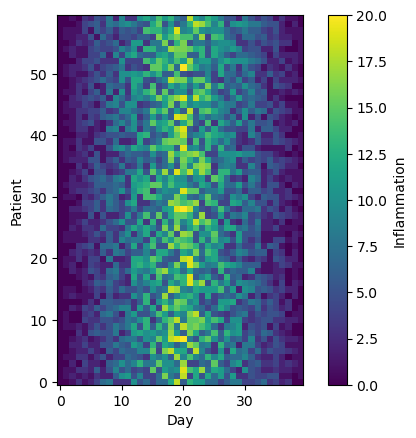

In [14]:
import matplotlib.pyplot as plt

image = plt.imshow(data, origin='lower') # origin = upper is default
cbar = plt.colorbar()

# adding labels and units
plt.ylabel("Patient")
plt.xlabel("Day")
cbar.set_label("Inflammation")
plt.show()

Each row corresponds to patient, while each columns corresponds to a day in the dataset. General inflammation flare-ups for pattients rises and then falls over a 40-day period.

In line with what we know from clinical trial and Dr. Maverick's claims:
* the patients take their medication once their inflammation flare-ups begin
* it takes around 3 weeks for the medication to take effect and begin reducing flare-ups
* and flare-ups appear to drop to zero by the end of the clinical trial.

Looking at average inflammation over time:

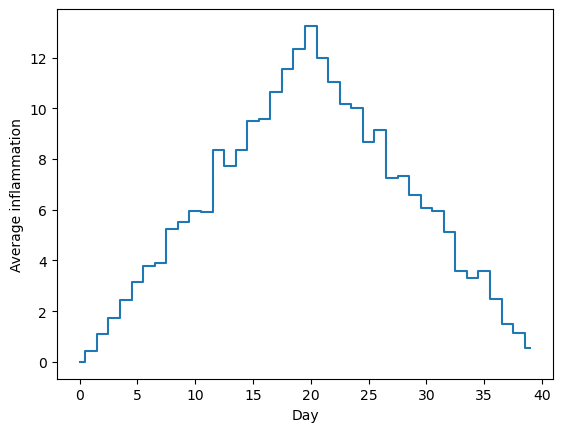

In [15]:
ave_inflammation = np.mean(data, axis=0)
# Note: drawstyle="steps-mid" to reflect discrete nature of data
ave_plot = plt.plot(ave_inflammation, drawstyle="steps-mid")
plt.ylabel("Average inflammation")
plt.xlabel("Day")
plt.show()

Notice a reasonable linear rise and fall,  in line with Dr. Maverick’s claim that the medication takes 3 weeks to take effect.

To have a better insight into the data set, need to take look at other statistics:

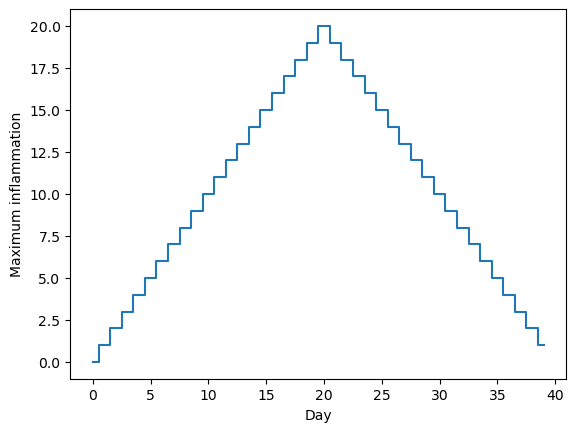

In [16]:
max_plot = plt.plot(np.max(data, axis=0), drawstyle="steps-mid")
plt.xlabel("Day")
plt.ylabel("Maximum inflammation")
plt.show()

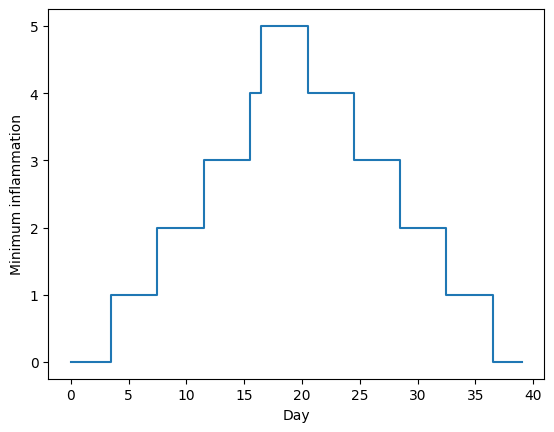

In [13]:
min_plot = plt.plot(np.min(data, axis=0), drawstyle="steps-mid")
plt.xlabel("Day")
plt.ylabel("Minimum inflammation")
plt.show()

The maximum value rises and falls linearly, while the minimum seems to be a step function. Neither trend seems particularly likely, so either there’s a mistake in our calculations or something is wrong with our data. This insight would have been difficult to reach by examining the numbers themselves without visualization tools.

## Making own plot

Plot showing standard deviation of implammation for each day across all patients

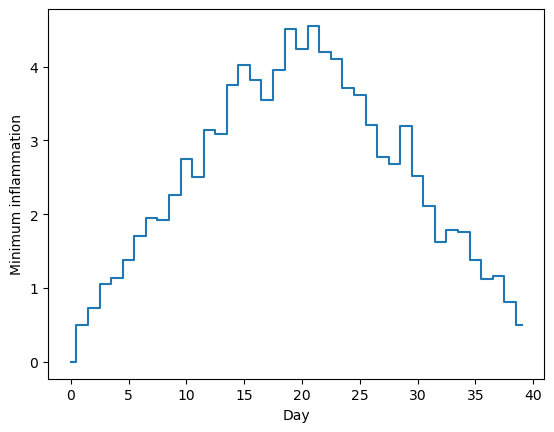

In [17]:
std_plot = plt.plot(np.std(data, axis=0), drawstyle="steps-mid")
plt.xlabel("Day")
plt.ylabel("Minimum inflammation")
plt.show()